In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
#aggiunte io:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [227]:
data = pd.read_csv('../data/MushroomDataset/processed_secondary_data.csv')

Poisonous mushrooms have a class of "1", edible "0".

In [228]:
X = data.drop(columns=['class'])
y = data['class']

## Train-test split

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression

In [230]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [231]:
y_pred = model.predict(X_test)

In [232]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7777140985754053
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      5436
           1       0.80      0.80      0.80      6778

    accuracy                           0.78     12214
   macro avg       0.77      0.78      0.78     12214
weighted avg       0.78      0.78      0.78     12214

Confusion Matrix:
 [[4086 1350]
 [1365 5413]]


In [233]:
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8593054217525384


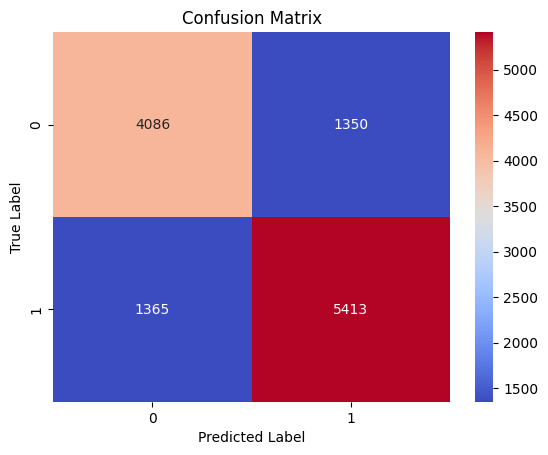

In [234]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Applying GridSearch to find best hyperparameters

In [235]:
parameter_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    ]

# Grid Search with 5-fold Cross-Validation

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=5000),
    param_grid=parameter_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=1,  # displaying the process
)


#### Evaluating the best model

In [236]:
#fitting the model
grid_search_lr.fit(X_train, y_train)

#best parameters
best_params = grid_search_lr.best_params_
best_model = grid_search_lr.best_estimator_

accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", accuracy)
print("Solver used in the best model:", best_model.solver)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Test Set Accuracy: 0.7777140985754053
Solver used in the best model: liblinear


We try other models:

## Random Forest Classifier


In [237]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [238]:
y_pred_3= model3.predict(X_test)

In [239]:
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_3):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_3))

Random Forest Results:
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

Confusion Matrix:
 [[5436    0]
 [   0 6778]]


Since the accuracy is really high we need to check if the model is overfitting on the training set

In [240]:
#check test and train accuracies
train_accuracy_3 = accuracy_score(y_train, model3.predict(X_train))
test_accuracy_3 = accuracy_score(y_test, y_pred_3)

print(f"Training Accuracy: {train_accuracy_3:.4f}")
print(f"Test Accuracy: {test_accuracy_3:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 1.0000


I evaluate the model using also the cross validation:

In [241]:
cv_scores = cross_val_score(model3, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.48018667 0.45930899 0.64311446 0.52415261 0.72938672]
Mean CV Accuracy: 0.5672


since Mean CV Accuracy is lower than the Test Accuracy the model is overfitting on the training set.

In [242]:
model3_limited = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,           
    min_samples_split=10,    
    min_samples_leaf=5       
)

model3_limited.fit(X_train, y_train)
y_pred_3_limited = model3_limited.predict(X_test)

Also with these parameters the model overfits on the training data:

In [243]:
print("Limited Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_3_limited):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_3_limited))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_3_limited))

Limited Random Forest Results:
Accuracy: 0.9767
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      5436
           1       0.98      0.97      0.98      6778

    accuracy                           0.98     12214
   macro avg       0.98      0.98      0.98     12214
weighted avg       0.98      0.98      0.98     12214

Confusion Matrix:
 [[5325  111]
 [ 174 6604]]


In [244]:
#check test and train accuracies
train_accuracy_lim = accuracy_score(y_train, model3_limited.predict(X_train))
test_accuracy_lim = accuracy_score(y_test, y_pred_3_limited)

print(f"Training Accuracy: {train_accuracy_lim:.4f}")
print(f"Test Accuracy: {test_accuracy_lim:.4f}")

# cross validation
cv_scores = cross_val_score(model3_limited, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Training Accuracy: 0.9778
Test Accuracy: 0.9767
Cross-Validation Scores: [0.47355494 0.49590634 0.58261012 0.53487801 0.76778842]
Mean CV Accuracy: 0.5709


Grid search


In [ ]:
'''
# Grid Search for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    verbose=1
)

grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
'''

Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

It takes a lot of time :(

## Decision Tree Classifier

In [246]:
model2= DecisionTreeClassifier(criterion="entropy", random_state=42)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [247]:
y_pred2 = model2.predict(X_test)

In [248]:
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy: 0.9978712952349763
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

Confusion Matrix:
 [[5422   14]
 [  12 6766]]


the accuracy is higher than with Logistic regression

In [249]:
train_accuracy = accuracy_score(y_train, model2.predict(X_train))
test_accuracy = accuracy_score(y_test, model2.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy + 0.1:  
    print("Possible overfitting in the model.")
else:
    print("The model is balanced.")


Training Accuracy: 1.0000
Test Accuracy: 0.9979
The model is balanced.


The accuracy is high on both sets, which indicates that the model is generalizing well and could mean that the model is too complex, so I check the depth, which if it is very high means that it probably has memorized the training set

In [250]:
print(model2.get_depth())  # depth
print(model2.get_n_leaves())  # N leaves

25
286


as I can see here:

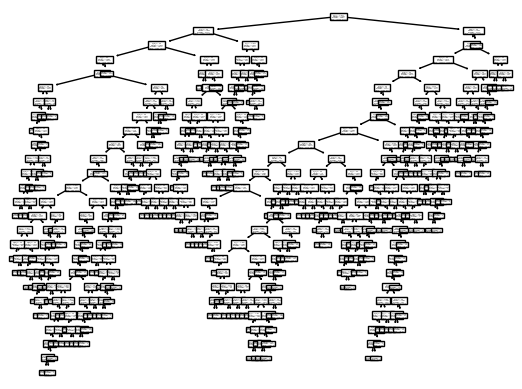

In [251]:
_ = tree.plot_tree(model2)

These values indicate that the model is probably very complex. This could be a sign of overfitting.

We can check if the model is overfitting using the cross validation

In [252]:
scores = cross_val_score(model2, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean CV Accuracy: {scores.mean():.4f}")

Cross-validation scores: [0.51956771 0.49672507 0.63795644 0.57352219 0.6342422 ]
Mean CV Accuracy: 0.5724


Since the Mean CV Accuracy is lower than the Test Accuracy that was 0.9979, probably the model is overfitting on the training set

In [253]:
# Grid Search per Decision Tree
param_grid_tree = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10]}
grid_search_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_tree,
    cv=5,
    scoring='accuracy',
    verbose=1
)

grid_search_tree.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search_tree.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}


## Ensemble

In [254]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier(random_state=42)
clf_rfor = RandomForestClassifier(random_state=42)

In [255]:
clf_voting_hard = VotingClassifier(
    estimators=[('lr', clf_logreg), ('dt', clf_tree), ('rf', clf_rfor)],
    voting='hard')
clf_voting_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))])

function to comprare accuracies of the three classifiers

In [256]:
from typing import List
def compare_classifiers_accuracies(clfs: List[object], X_train, X_test, y_train, y_test):
    """Fit each classifier and compare their accuracies."""
    for clf in clfs:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"{clf.__class__.__name__}:", accuracy_score(y_test, y_pred))


In [257]:
compare_classifiers_accuracies([clf_logreg, clf_tree,clf_rfor, clf_voting_hard], X_train, X_test, y_train, y_test)

LogisticRegression: 0.7777140985754053
DecisionTreeClassifier: 0.9969706893728508
RandomForestClassifier: 1.0
VotingClassifier: 0.9986900278369084


with soft voting

In [258]:
clf_voting_soft = VotingClassifier(
    estimators=[('lr', clf_logreg), ('dt', clf_tree)],
    voting='soft')
clf_voting_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [259]:
compare_classifiers_accuracies([clf_logreg,  clf_tree, clf_rfor, clf_voting_soft], X_train, X_test, y_train, y_test)

LogisticRegression: 0.7777140985754053
DecisionTreeClassifier: 0.9969706893728508
RandomForestClassifier: 1.0
VotingClassifier: 0.9969706893728508


maybe we can do the pruning on the decision tree to have a max depth